In [1]:
import json

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Benchmarking Results

In [2]:
!ls ../data/*.json

../data/4-best_knn_evaluation_results.json
../data/5-best_logistic_evaluation_results.json
../data/6-best_rf_evaluation_results.json
../data/8-best_xgb_evaluation_results.json


In [3]:
# Load the JSON file
with open("../data/4-best_knn_evaluation_results.json", "r") as json_file:
    knn_json = json.load(json_file)
with open("../data/5-best_logistic_evaluation_results.json", "r") as json_file:
    logreg_json = json.load(json_file)
with open("../data/6-best_rf_evaluation_results.json", "r") as json_file:
    rf_json = json.load(json_file)

In [4]:
knn_json.keys()

dict_keys(['confusion_matrix', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_curve', 'precision_recall_curve'])

In [5]:
knn_json["roc_curve"].keys()

dict_keys(['fpr', 'tpr', 'roc_auc'])

In [6]:
knn_json["precision_recall_curve"].keys()

dict_keys(['precision', 'recall', 'average_precision'])

# Confusion Matrix

In [7]:
knn_json['confusion_matrix']

[[319, 2683], [167, 16831]]

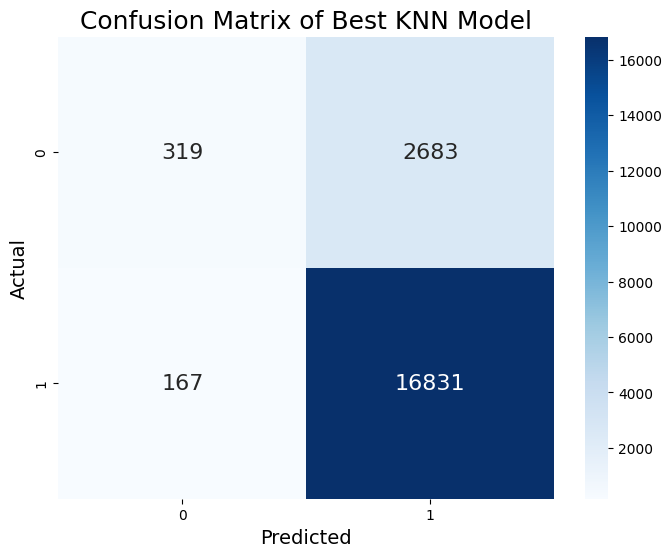

In [8]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_json['confusion_matrix'], annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize": 16})

plt.title('Confusion Matrix of Best KNN Model', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# plt.savefig("../data/7-Confusion Matrix of Best KNN Model.png")
plt.show()

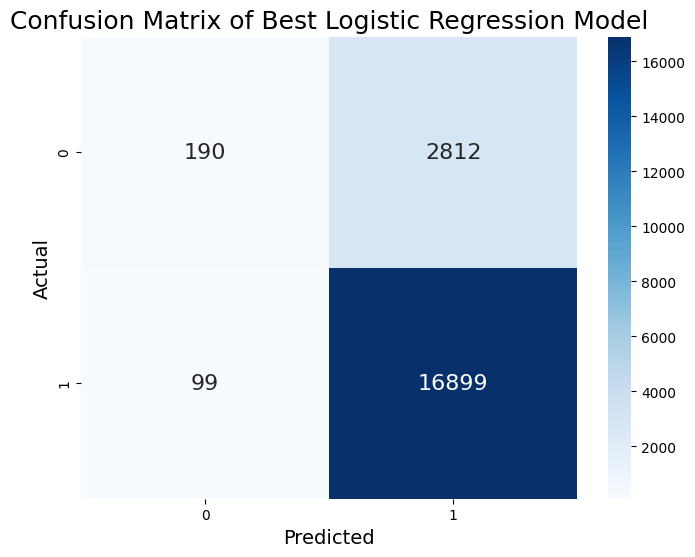

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_json['confusion_matrix'], annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize": 16})

plt.title('Confusion Matrix of Best Logistic Regression Model', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# plt.savefig("../data/7-Confusion Matrix of Best Logistic Regression Model.png")
plt.show()

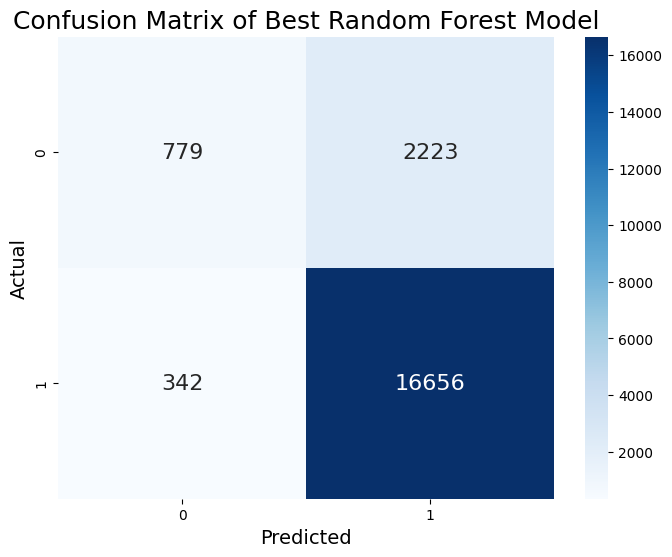

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_json['confusion_matrix'], annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize": 16})

plt.title('Confusion Matrix of Best Random Forest Model', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# plt.savefig("../data/7-Confusion Matrix of Best Random Forest Model.png")
plt.show()

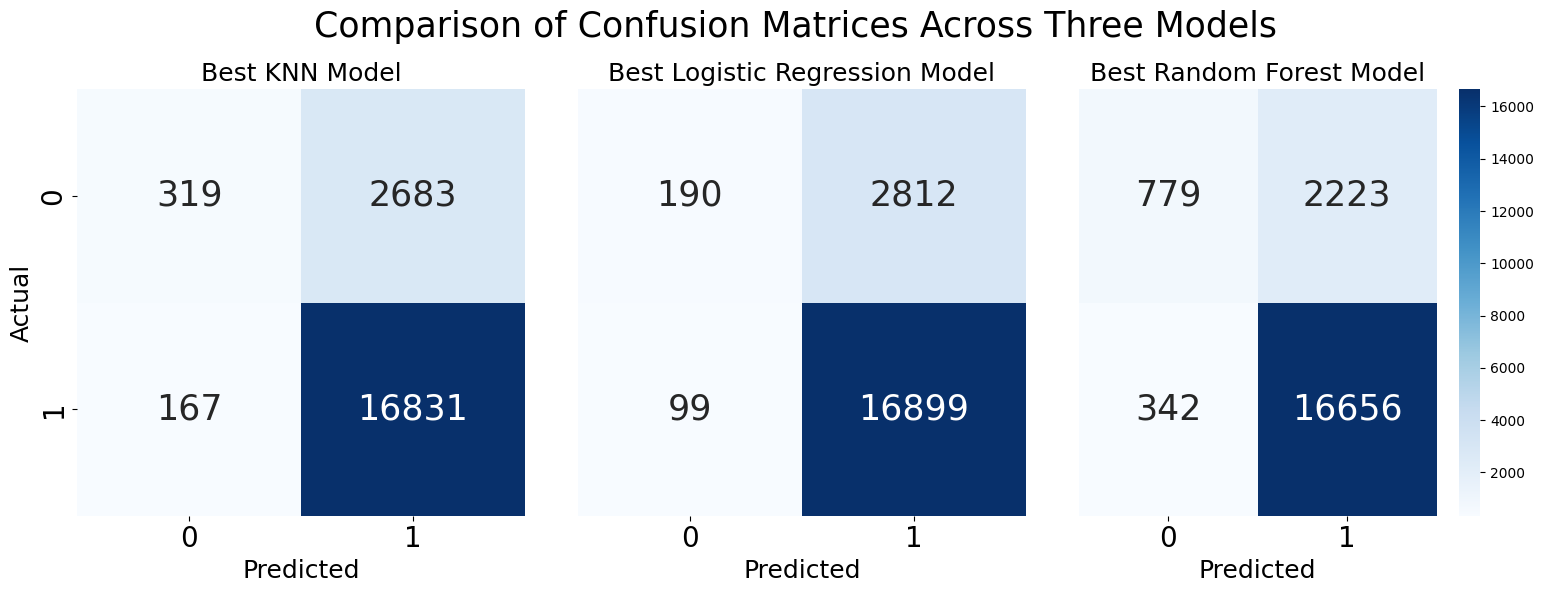

In [11]:
# Define a single colormap
cmap = 'Blues'

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot the confusion matrix for KNN model
sns.heatmap(knn_json['confusion_matrix'], annot=True, cmap=cmap, fmt='g', annot_kws={"fontsize": 25}, ax=axes[0], cbar=False)
axes[0].set_title('Best KNN Model', fontsize=18)
axes[0].set_xlabel('Predicted', fontsize=18)
axes[0].set_ylabel('Actual', fontsize=18)
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)

# Plot the confusion matrix for Logistic Regression model
sns.heatmap(logreg_json['confusion_matrix'], annot=True, cmap=cmap, fmt='g', annot_kws={"fontsize": 25}, ax=axes[1], cbar=False)
axes[1].set_title('Best Logistic Regression Model', fontsize=18)
axes[1].set_xlabel('Predicted', fontsize=18)
# axes[1].set_ylabel('Actual', fontsize=18)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].set_yticklabels([]) 
axes[1].tick_params(axis='y', length=0)

# Plot the confusion matrix for Random Forest model
sns.heatmap(rf_json['confusion_matrix'], annot=True, cmap=cmap, fmt='g', annot_kws={"fontsize": 25}, ax=axes[2], cbar=True)
axes[2].set_title('Best Random Forest Model', fontsize=18)
axes[2].set_xlabel('Predicted', fontsize=18)
# axes[2].set_ylabel('Actual', fontsize=18)
axes[2].tick_params(axis='x', labelsize=20)
axes[2].set_yticklabels([]) 
axes[2].tick_params(axis='y', length=0)

fig.suptitle('Comparison of Confusion Matrices Across Three Models', fontsize=25)
plt.subplots_adjust(wspace=4)
plt.tight_layout()

plt.savefig("../data/7-Combined_Confusion_Matrix.png")
plt.show()

# Scoring

In [12]:
scoring_names = ['accuracy', 'precision', 'recall', 'f1_score']
scoring_list = []

In [13]:
for scoring_name in scoring_names:
    scoring_list.append({
        "model": "KNN",
        "scoring": scoring_name,
        "value": knn_json[scoring_name]
    })
for scoring_name in scoring_names:
    scoring_list.append({
        "model": "LR",
        "scoring": scoring_name,
        "value": logreg_json[scoring_name]
    })
for scoring_name in scoring_names:
    scoring_list.append({
        "model": "RF",
        "scoring": scoring_name,
        "value": rf_json[scoring_name]
    })

In [14]:
scoring_df = pd.DataFrame(scoring_list)
scoring_df

,model,scoring,value
0,KNN,accuracy,0.857500
1,KNN,precision,0.862509
2,KNN,recall,0.990175
3,KNN,f1_score,0.921943
4,LR,accuracy,0.854450
5,LR,precision,0.857339
6,LR,recall,0.994176
7,LR,f1_score,0.920701
8,RF,accuracy,0.871750
9,RF,precision,0.882250


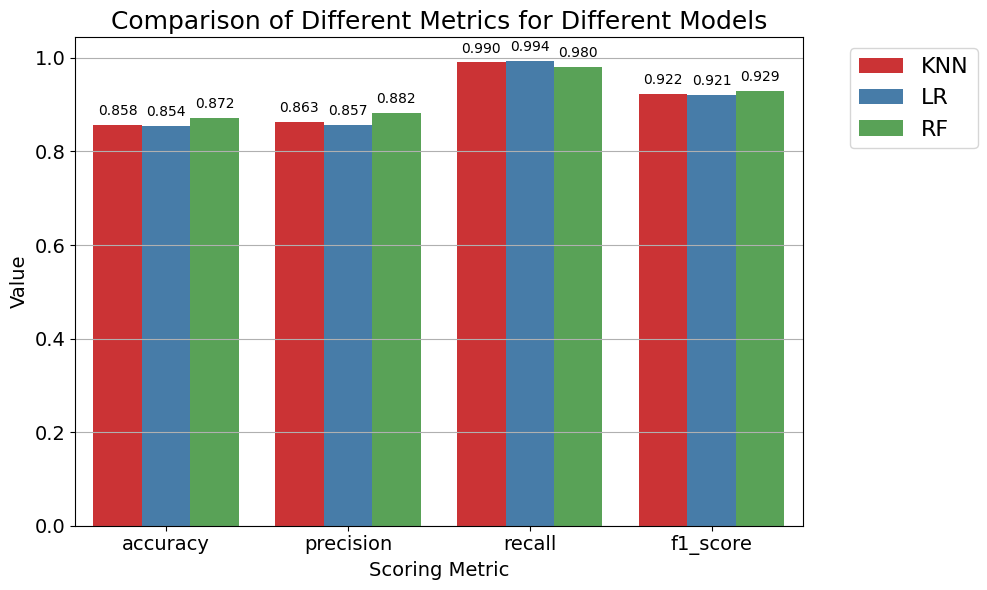

In [15]:
# set color palette to get three distinct colors
colors = sns.color_palette("Set1", 3)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=scoring_df, y='value', x='scoring', hue='model', palette=colors)

# Annotate values above each bar
for p in ax.patches:
    if p.get_label() != "_nolegend_": continue
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Scoring Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Comparison of Different Metrics for Different Models', fontsize=18)
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig("../data/7-Comparison of Different Metrics for Different Models.png")
plt.show()

# ROC 

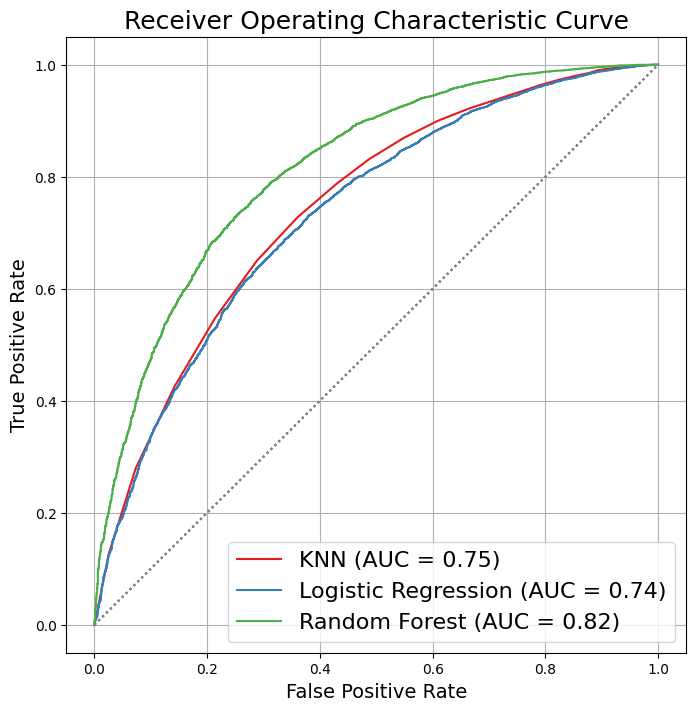

In [16]:
def plot_roc_curve(model_json, model_name, color):
    roc_curve_data = model_json['roc_curve']
    fpr = roc_curve_data['fpr']
    tpr = roc_curve_data['tpr']
    roc_auc = roc_curve_data['roc_auc']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='dotted')


plt.figure(figsize=(8, 8))

plot_roc_curve(knn_json, 'KNN', colors[0])
plot_roc_curve(logreg_json, 'Logistic Regression', colors[1])
plot_roc_curve(rf_json, 'Random Forest', colors[2])

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.savefig("../data/7-Receiver Operating Characteristic Curve.png")
plt.show()


# PRC 

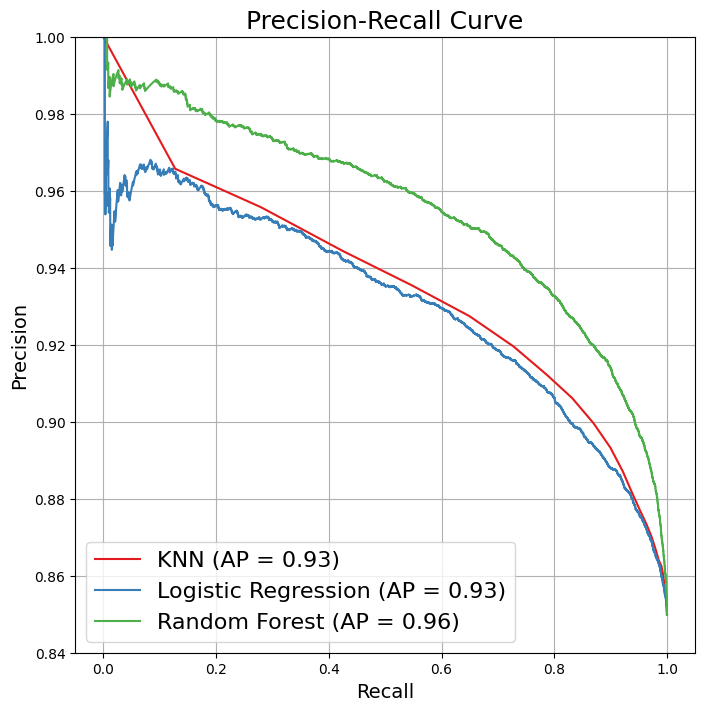

In [17]:
def plot_pr_curve(model_json, model_name, color):
    pr_curve_data = model_json['precision_recall_curve']
    precision = pr_curve_data['precision']
    recall = pr_curve_data['recall']
    average_precision = pr_curve_data['average_precision']
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision:.2f})', color=color)

plt.figure(figsize=(8, 8))

plot_pr_curve(knn_json, 'KNN', colors[0])
plot_pr_curve(logreg_json, 'Logistic Regression', colors[1])
plot_pr_curve(rf_json, 'Random Forest', colors[2])

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=18)
plt.legend(loc='lower left', fontsize=16)
plt.grid(True)
plt.ylim(0.84, 1)
plt.savefig("../data/7-Precision-Recall Curve.png")
plt.show()